In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
##Loading Dataset
df = pd.read_csv("StudentsPerformance.csv")  # change path if needed
print(df.shape)

(1000, 8)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [6]:
df['gender'] = df['gender'].map({'male': 0, 'female': 1})

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group B,bachelor's degree,standard,none,72,72,74
1,1,group C,some college,standard,completed,69,90,88
2,1,group B,master's degree,standard,none,90,95,93
3,0,group A,associate's degree,free/reduced,none,47,57,44
4,0,group C,some college,standard,none,76,78,75


In [8]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [9]:
df = pd.get_dummies(df, columns=['race/ethnicity'], drop_first=True)

In [10]:
df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,1,bachelor's degree,standard,none,72,72,74,True,False,False,False
1,1,some college,standard,completed,69,90,88,False,True,False,False
2,1,master's degree,standard,none,90,95,93,True,False,False,False
3,0,associate's degree,free/reduced,none,47,57,44,False,False,False,False
4,0,some college,standard,none,76,78,75,False,True,False,False


In [11]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [12]:
## Education Map
education_map = {
    "some high school":0,
    "high school":1,
    "associate's degree":2,
    "some college":3,
    "bachelor's degree": 4,
    "master's degree": 5
}

df['parental level of education'] = df['parental level of education'].map(education_map)

In [13]:
df.head()


,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,1,4,standard,none,72,72,74,True,False,False,False
1,1,3,standard,completed,69,90,88,False,True,False,False
2,1,5,standard,none,90,95,93,True,False,False,False
3,0,2,free/reduced,none,47,57,44,False,False,False,False
4,0,3,standard,none,76,78,75,False,True,False,False


In [14]:
##lunch

In [15]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [16]:
df['lunch'] = df['lunch'].map({'standard': 0, 'free/reduced': 1})

In [17]:
##test preparation course
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [18]:
df['test preparation course'] = df['test preparation course'].map({'none':0, 'completed':1})
df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,1,4,0,0,72,72,74,True,False,False,False
1,1,3,0,1,69,90,88,False,True,False,False
2,1,5,0,0,90,95,93,True,False,False,False
3,0,2,1,0,47,57,44,False,False,False,False
4,0,3,0,0,76,78,75,False,True,False,False


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   int64
 1   parental level of education  1000 non-null   int64
 2   lunch                        1000 non-null   int64
 3   test preparation course      1000 non-null   int64
 4   math score                   1000 non-null   int64
 5   reading score                1000 non-null   int64
 6   writing score                1000 non-null   int64
 7   race/ethnicity_group B       1000 non-null   bool 
 8   race/ethnicity_group C       1000 non-null   bool 
 9   race/ethnicity_group D       1000 non-null   bool 
 10  race/ethnicity_group E       1000 non-null   bool 
dtypes: bool(4), int64(7)
memory usage: 58.7 KB


In [20]:
df['avg_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

In [21]:
df.columns

Index(['gender', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group D', 'race/ethnicity_group E', 'avg_score'],
      dtype='object')

In [22]:
X = df.drop(columns=['math score', 'reading score', 'writing score'])


<Axes: >

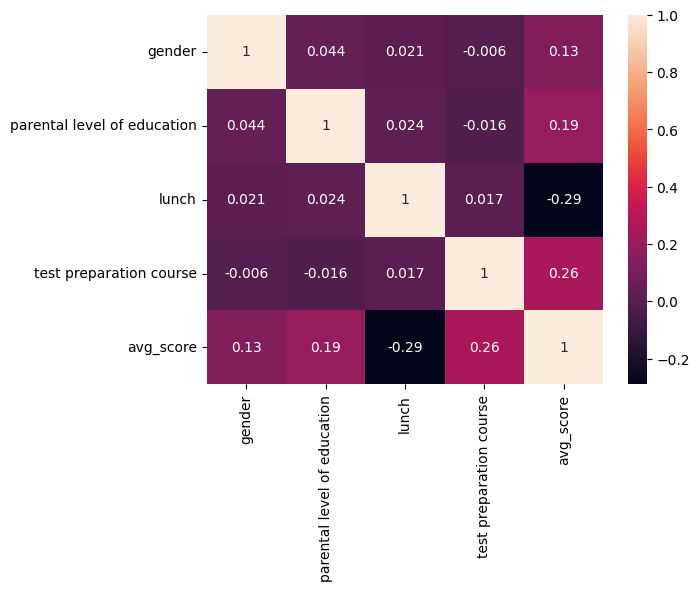

In [23]:
sns.heatmap(X.select_dtypes(include=['int64', 'float64']).corr(), annot=True)

In [24]:
X[X.duplicated()]

,gender,parental level of education,lunch,test preparation course,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,avg_score
90,1,4,0,0,False,True,False,False,70.333333
155,1,3,0,1,False,True,False,False,82.333333
193,0,3,0,1,False,False,True,False,67.000000
304,1,2,0,1,False,True,False,False,77.333333
417,0,2,0,0,False,True,False,False,71.333333
443,1,2,0,0,True,False,False,False,77.333333
611,1,3,0,0,False,True,False,False,61.000000
638,0,3,0,0,False,False,False,True,78.666667
707,0,3,0,0,False,True,False,False,59.000000
745,0,2,0,0,False,False,True,False,75.000000


In [25]:
X.shape

(1000, 9)

In [26]:
X.drop_duplicates(inplace=True)

In [27]:
X.shape

(984, 9)

In [28]:
X = X.dropna()

In [29]:
X.shape

(984, 9)

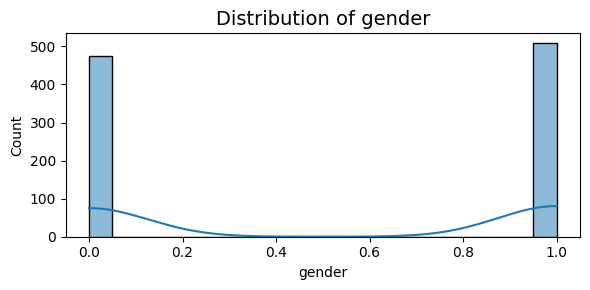

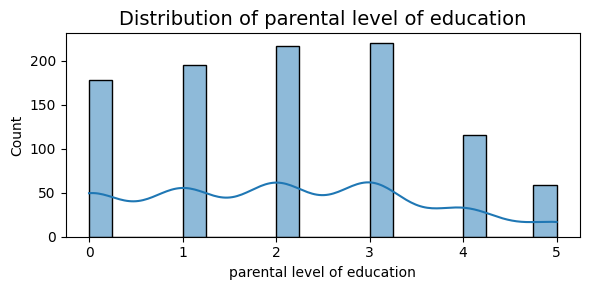

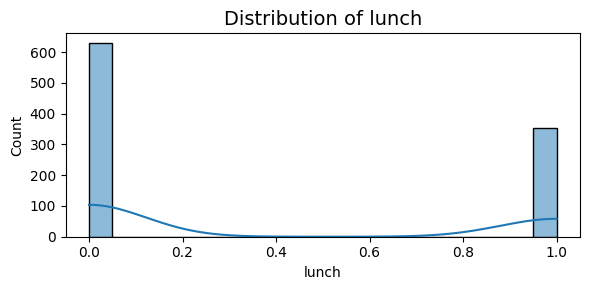

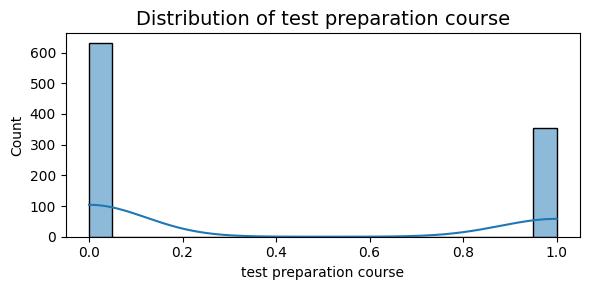

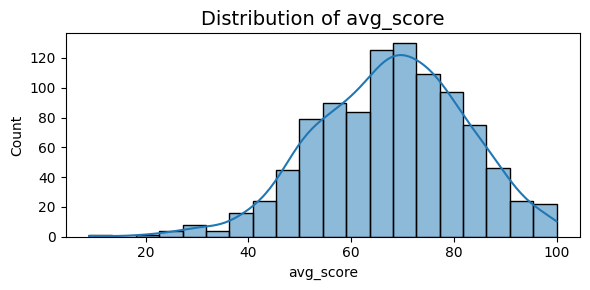

In [30]:
for col in X.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(6, 3))  # individual figure size
    sns.histplot(X[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

In [31]:
X.to_csv("StudentCleaned.csv", index=False)
